<a href="https://colab.research.google.com/github/techyPinakjoshi/MLPROJECT/blob/main/Linear_Regression_Implementation_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

<ipython-input-1-f27a1d36e8b5>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [4]:
from google.colab import files
uploaded = files.upload()



Saving 50_Startups.csv to 50_Startups.csv


In [6]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
df.shape

(50, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


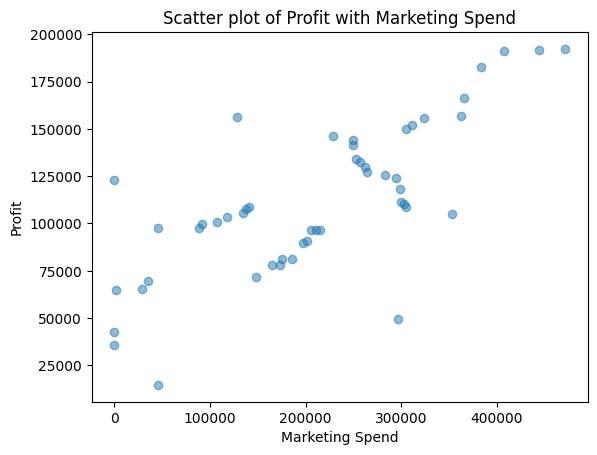

In [14]:
plt.scatter(df['Marketing Spend'], df['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

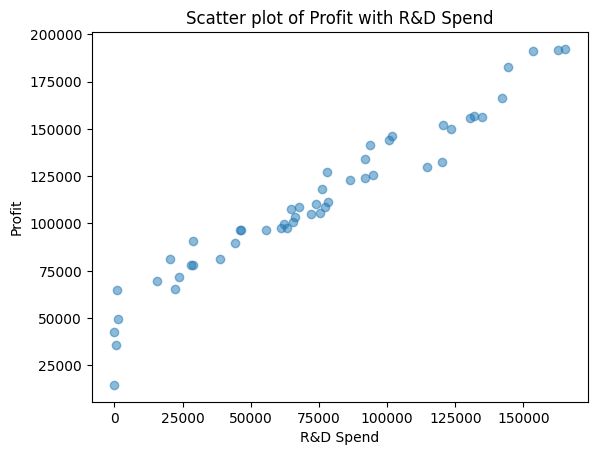

In [18]:
plt.scatter(df['R&D Spend'], df['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

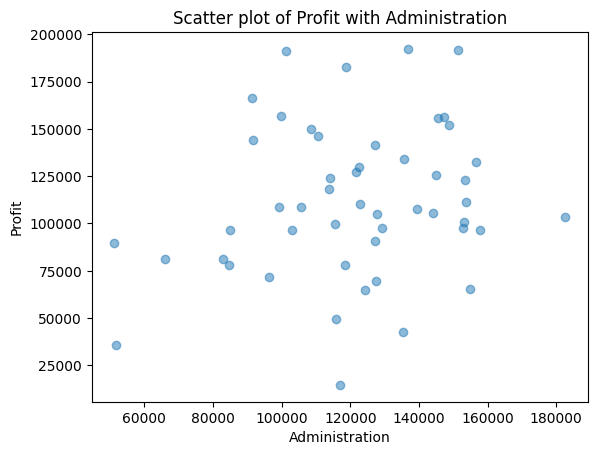

In [17]:
plt.scatter(df['Administration'], df['Profit'], alpha=0.5)
plt.title('Scatter plot of Profit with Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

Text(0, 0.5, 'Profit')

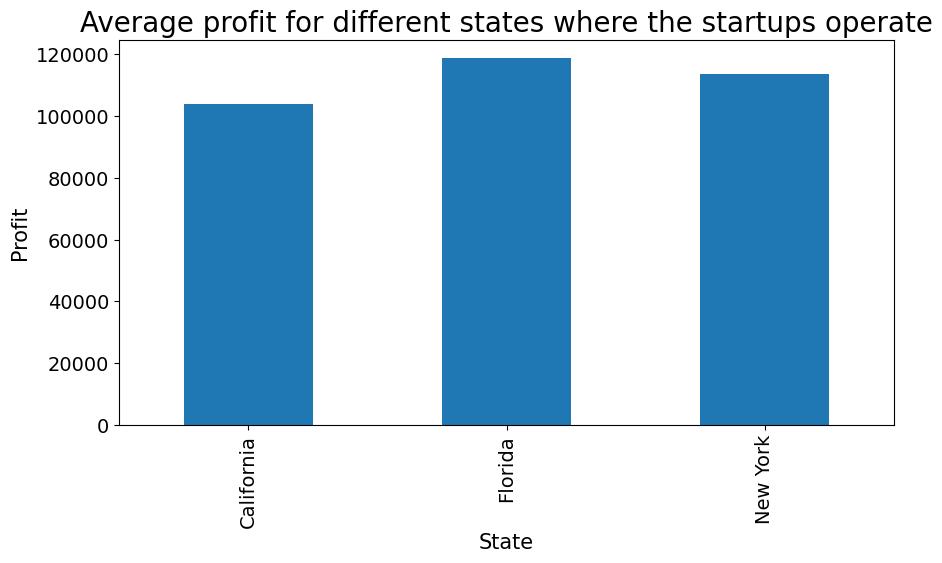

In [19]:
ax = df.groupby(['State'])['Profit'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

# Set the title
ax.set_title("Average profit for different states where the startups operate", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("State", fontsize = 15)
ax.set_ylabel("Profit", fontsize = 15)

In [20]:
df.State.value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

In [21]:
df['NewYork_State'] = np.where(df['State']=='New York', 1, 0)
df['California_State'] = np.where(df['State']=='California', 1, 0)
df['Florida_State'] = np.where(df['State']=='Florida', 1, 0)

# Drop the original column State from the dataframe
df.drop(columns=['State'],axis=1,inplace=True)

In [22]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_State,California_State,Florida_State
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [23]:
dependent_variable = 'Profit'

In [25]:
# Create a list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

In [27]:
independent_variables

['Florida_State',
 'NewYork_State',
 'Marketing Spend',
 'R&D Spend',
 'Administration',
 'California_State']

In [28]:
# Create the data of independent variables
X = df[independent_variables].values

# Create the dependent variable data
y = df[dependent_variable].values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [30]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
X_train[0:10]

array([[1.        , 0.        , 0.45494286, 0.33561668, 0.48655174,
        0.        ],
       [0.        , 1.        , 0.43561799, 0.2782839 , 0.3173015 ,
        0.        ],
       [1.        , 0.        , 0.28413435, 0.45557444, 0.87258866,
        0.        ],
       [0.        , 0.        , 0.44680961, 0.2807759 , 1.        ,
        1.        ],
       [1.        , 0.        , 0.62511553, 0.55488118, 0.59103645,
        0.        ],
       [1.        , 0.        , 0.68649342, 0.7880179 , 0.88568959,
        0.        ],
       [1.        , 0.        , 0.54370828, 0.72539353, 0.98922572,
        0.        ],
       [0.        , 1.        , 0.0040356 , 0.0060492 , 0.6847981 ,
        0.        ],
       [0.        , 1.        , 0.        , 0.00327821, 0.00432296,
        0.        ],
       [0.        , 1.        , 0.22709197, 0.39676926, 0.95618996,
        0.        ]])

In [32]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [33]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [34]:
math.sqrt(mean_squared_error(y_test, y_pred))


9137.990152794935

In [35]:
r2_score(y_test, y_pred)

0.9347068473282426